# **SDG 9: Inclusive and sustainable industrialization**

## **Narrowing Scope**

<img src="..\assets\images\Narrowing Scope.png" alt="Corn Rust Disease" width="800"/>

## **Motivation for the Project**

<img src="..\assets\images\Motivation.png" alt="Corn Rust Disease" width="800"/>

## **Objective (Solution)**

<img src="..\assets\images\OBJ.png" alt="Corn Rust Disease" width="800"/>

## **Corn Disease Classification**

`Corn Rust`, `Grey Leaf Spot`, and `Leaf Blight` are common diseases that corn farmers frequently encounter. These diseases can significantly impact crop health and yield if not managed properly.

**Corn Rust:**

- Cause: Caused by fungal pathogens, primarily Puccinia sorghi (common rust) or Puccinia polysora (southern rust).

- Symptoms: Orange to brown pustules on leaves, which can reduce photosynthesis and weaken the plant.

- Management: Resistant hybrids, fungicide applications, and crop rotation.

**Grey Leaf Spot:**

- Cause: Caused by the fungus Cercospora zeae-maydis.

- Symptoms: Rectangular, gray to tan lesions on leaves, often starting on lower leaves and spreading upward.

- Management: Resistant hybrids, timely fungicide applications, and reducing crop residue.

**Leaf Blight:**

- Cause: Commonly caused by Exserohilum turcicum (Northern Corn Leaf Blight) or Bipolaris maydis (Southern Corn Leaf Blight).

- Symptoms: Long, elliptical, gray-green to tan lesions on leaves, which can coalesce and cause significant leaf damage.

- Management: Resistant hybrids, fungicides, and crop rotation to reduce pathogen carryover.

---

**Data Overview:**

In the [dataset](https://universe.roboflow.com/corn-disease-7/corn-diseases-oxojk/dataset/2) from roboflow there are 3 types of diseases we chose for our classification such as `Corn Rust`, `Grey Leaf Spot`, `Leaf Blight`.

**Corn Rust**

<img src="..\assets\images\Corn Rust.png" alt="Corn Rust Disease" width="300"/>
<br>
<a href="https://ohioline.osu.edu/factsheet/plpath-cer-02">More About Corn Rust</a>

**Grey Leaf Spot**

<img src="..\assets\images\Gray Leaf Spot.png" alt="Corn Rust Disease" width="300"/>
<br>
<a href="https://extension.umn.edu/corn-pest-management/gray-leaf-spot-corn">More About Grey Leaf Spot</a>

**Leaf Blight**

<img src="..\assets\images\Corn Leaf Blight.png" alt="Corn Rust Disease" width="300"/>
<br>
<a href="https://extension.umn.edu/corn-pest-management/northern-corn-leaf-blight">More About Leaf Blight</a>

## **Exploratory Data Analysis (EDA)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv(r"..\datasets\finalized-data\csv\combined_data.csv")
df.head()

,filename,Corn Rust,Grey Leaf Spot,Leaf Blight
0,Corn_Common_Rust--48-_jpg.rf.1bfa1291fb403f18e...,1,0,0
1,Corn_Common_Rust--1271-_jpg.rf.425ca7b4f487335...,1,0,0
2,1b4a7e7d-792a-4e22-aefd-617c7ce9fae8___RS_GLSp...,0,1,0
3,Corn_Gray_Spot--35-_jpg.rf.282b65fa3f7f3556bf4...,0,1,0
4,1643674233449_jpeg_jpg.rf.3598f088b27a4e4ff512...,1,0,0


**Class Distribution Analysis**

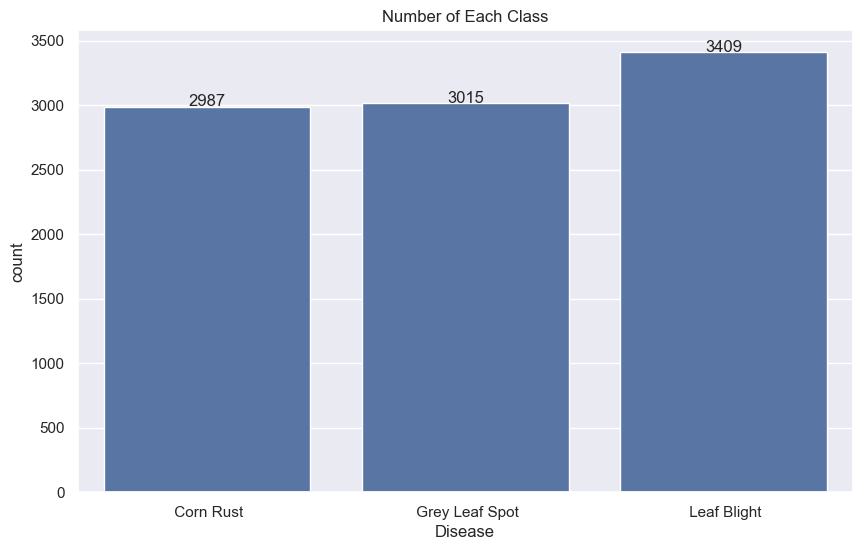

In [ ]:
# Melt the dataframe to have a long format
df_melted = df.melt(id_vars=['filename'], value_vars=[' Corn Rust', ' Grey Leaf Spot', ' Leaf Blight'], var_name='Disease', value_name='Count')

# Filter the dataframe to include only rows where Count is 1
df_filtered = df_melted[df_melted['Count'] == 1]

# Plot the number on each column
plt.figure(figsize=(10, 6))
plt.title("Number of Each Class")
for p in sns.countplot(data=df_filtered, x='Disease').patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center")


**Inspect the Image Data**

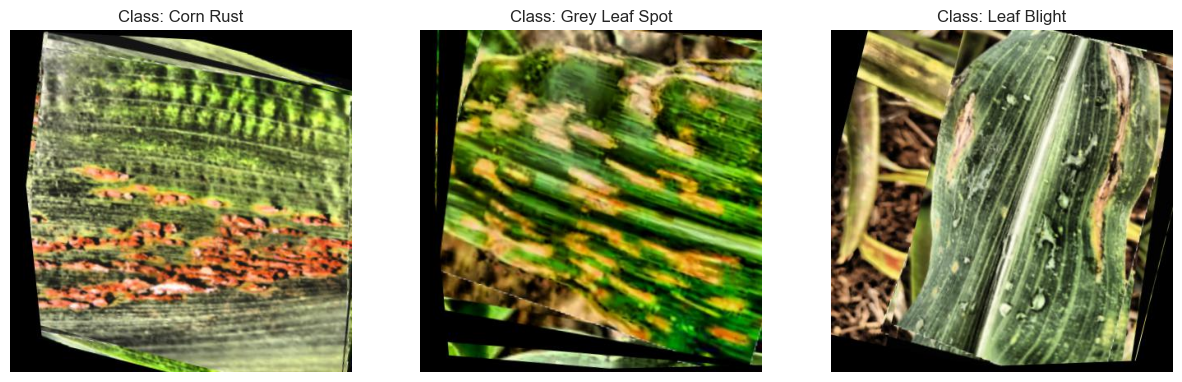

In [ ]:
import cv2
import os
import random

# Example: Display random images from each class
# Add a 'class' column to the dataframe based on the disease columns
classes = ['Corn Rust', 'Grey Leaf Spot', 'Leaf Blight']
image_folder = "D:\\School\\ITC\\Y3\\Semet 2\\Mini Project\\Project Folder\\Corn-Disease-Detection\\datasets\\finalized-data\\raw-data"

# Add a 'class' column to the dataframe based on the disease columns
df['class'] = df.apply(lambda row: 'Corn Rust' if row[' Corn Rust'] == 1 else ('Grey Leaf Spot' if row[' Grey Leaf Spot'] == 1 else 'Leaf Blight'), axis=1)

plt.figure(figsize=(15, 5))

for i, cls in enumerate(classes):
    class_images = df[df['class'] == cls]['filename'].tolist()
    sample_image = random.choice(class_images)
    img_path = os.path.join(image_folder, sample_image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
    
    plt.subplot(1, len(classes), i + 1)
    plt.imshow(img)
    plt.title(f'Class: {cls}')
    plt.axis('off')

plt.show()

**Image Metrics Analysis**

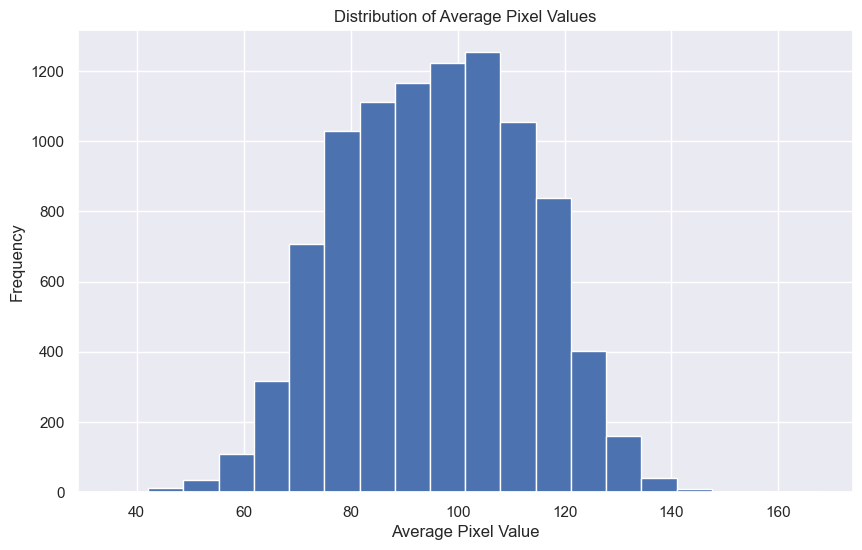

In [ ]:
import cv2
import numpy as np

def compute_avg_pixel(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path {image_path} could not be read.")
    return np.mean(img)

# Example usage
avg_pixels = []
for image_path in df['filename']:
    full_image_path = f"D:\\School\\ITC\\Y3\\Semet 2\\Mini Project\\Project Folder\\Corn-Disease-Detection\\datasets\\finalized-data\\raw-data\\{image_path}"
    try:
        avg_pixels.append(compute_avg_pixel(full_image_path))
    except ValueError as e:
        print(e)

# Plotting average pixel values
plt.figure(figsize=(10,6))
plt.hist(avg_pixels, bins=20)
plt.xlabel('Average Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Pixel Values')
plt.show()


It gives the overall brightness or intensity of an image by averaging the pixel values across all channels.

**Calculating the Average Pixel Value:**
- For a single pixel in an RGB image, the average value is calculated as:

$$Average = \frac{Red + Green + Blue}{3}$$

- For the entire image, the average pixel value is the mean of all pixel averages:

$$\text{Average Pixel Value} = \frac{1}{N} \sum_{i=1}^{N} (\frac{Red_i + Green_i + Blue_i}{3})$$

Where $N$ is the total number of pixels in the image.

**Get Image Sizes in (kb)**

In [ ]:
import os

# function to get image size
def git_file_size_kb(filename):
    image_path = f"..\\datasets\\finalized-data\\raw-data\\{filename}"
    if os.path.isfile(image_path):
        return os.path.getsize(image_path) / 1024
    else:
        return None
    
# aplly the function to df
df['file_size_kb'] = df['filename'].apply(lambda x: git_file_size_kb(x))

In [ ]:
df['file_size_kb'].head()

0    41.333008
1    43.396484
2    43.596680
3    50.193359
4    39.402344
Name: file_size_kb, dtype: float64

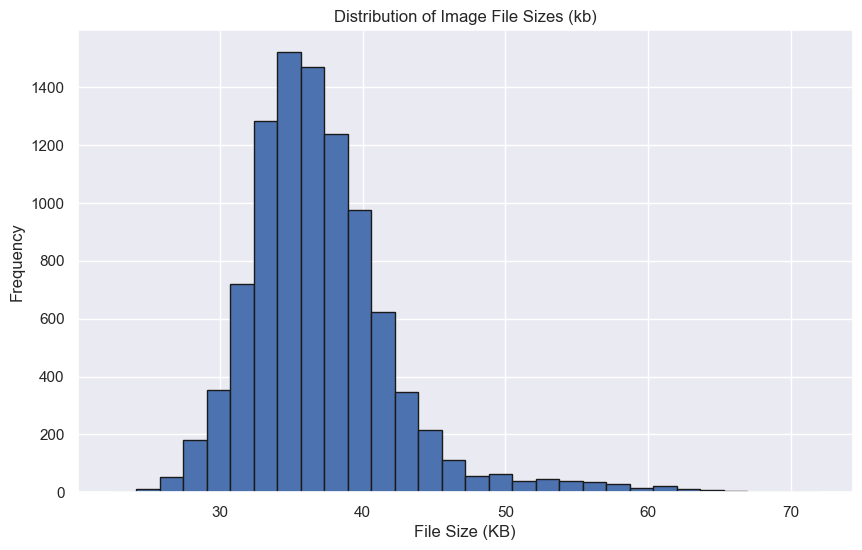

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['file_size_kb'], bins=30, edgecolor='k')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Distribution of Image File Sizes (kb)')
plt.show()

Understanding the average size of images helps in planning storage requirements and computational resources needed for processing the dataset

**Visualize Image Statistics**

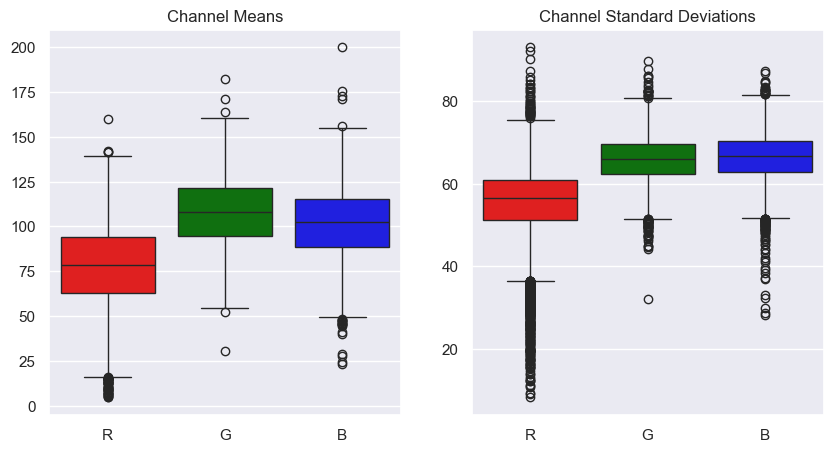

In [ ]:
import numpy as np
import cv2

# compute mean and std for each channel (RGB)
means, stds = [], []

for image_name in df['filename']:
    full_image_path = f"D:\\School\\ITC\\Y3\\Semet 2\\Mini Project\\Project Folder\\Corn-Disease-Detection\\datasets\\finalized-data\\raw-data\\{image_name}"
    img = cv2.imread(full_image_path)
    
    if img is not None:
        means.append(img.mean(axis=(0, 1)))
        stds.append(img.std(axis=(0, 1)))
        
means = np.array(means)
stds = np.array(stds)

# plot mean and std for each channel
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame(means, columns=['R', 'G', 'B']), palette={'R': 'red', 'G': 'green', 'B': 'blue'})
plt.title('Channel Means')

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(stds, columns=['R', 'G', 'B']), palette={'R': 'red', 'G': 'green', 'B': 'blue'})
plt.title('Channel Standard Deviations')
plt.show()    
        
        


This visualizes the mean and standard deviation of pixel values for each color channel (Red, Green, Blue) across all images in your dataset. These statistics shows the overall color distribution and variability in your images.

**Check Image Dimensions**

        width  height
count  9466.0  9466.0
mean    416.0   416.0
std       0.0     0.0
min     416.0   416.0
25%     416.0   416.0
50%     416.0   416.0
75%     416.0   416.0
max     416.0   416.0


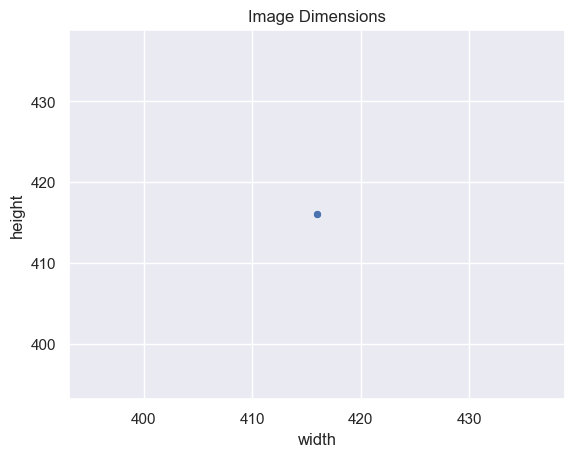

In [ ]:
image_sizes = []

for img_name in df['filename']:
    img_path = f"D:\\School\\ITC\\Y3\\Semet 2\\Mini Project\\Project Folder\\Corn-Disease-Detection\\datasets\\finalized-data\\raw-data\\{image_name}"
    img = cv2.imread(img_path)
    if img is not None:
        height, width, _ = img.shape
        image_sizes.append((width, height))

# Convert to DataFrame for analysis
size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
print(size_df.describe())

# Plot image sizes
sns.scatterplot(data=size_df, x='width', y='height')
plt.title('Image Dimensions')
plt.show()

**Decide what model to use?**

<img src="..\assets\images\CNNs.png" alt="CNNs" width="800"/>

*Convolutional Neural Networks (CNNs)* are particularly well-suited for image classification tasks, such as detecting diseases in corn plants